In [1]:
! pip install geoplot

     |████████████████████████████████| 12.1MB 294kB/s 
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
    Preparing wheel metadata ... done
     |████████████████████████████████| 1.0MB 39.4MB/s 
     |████████████████████████████████| 225kB 44.2MB/s 
     |████████████████████████████████| 6.5MB 37.2MB/s 
     |████████████████████████████████| 15.3MB 333kB/s 
     |████████████████████████████████| 19.1MB 124kB/s 
  Created wheel for cartopy: filename=Cartopy-0.19.0.post1-cp37-cp37m-linux_x86_64.whl size=12516165 sha256=d56d2541ef59cc1c47d07b3941a81b26e9edfb7e017837cd2653460bc99f57f3
  Stored in directory: /root/.cache/pip/wheels/45/7f/3b/37879587817fd1bbbee7b47312e2401b4f542cccf2fbe9b4ee
Successfully built cartopy
  Created wheel for pyshp: filename=pyshp-2.1.3-cp37-none-any.whl size=37264 sha256=47661ec7f60822adeb3520c0d97543b20ef9b124eccffc76be783422b894f96d
  Stored in directory: /root/.cache/pip/wheels/76/2b/d4/53e6b9a0fb0a9f9f29664cf826

In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import requests

In [4]:
df_kasus = pd.read_csv('lintang-wasesa-kasus-per-provinsi.csv').iloc[:,1:]
df_kasus = df_kasus.drop(columns=['Confirmed','Recovered','Deaths','updateUnix','logo'],axis = 1)
df_kasus['Provinsi'] = df_kasus['Provinsi'].apply(lambda x: x.upper())
df_kasus

,Provinsi,Active cases,updateDate,updateTime,latitude,longitude
0,DI. ACEH,1195,2020-04-30,18:39:39.806188,4.695135,96.749399
1,BALI,1255,2020-04-30,18:39:39.806188,-8.409518,115.188916
2,BANGKA BELITUNG,1563,2020-04-30,18:39:39.806188,-2.741051,106.440587
3,PROBANTEN,1875,2020-04-30,18:39:39.806188,-6.405817,106.064018
4,BENGKULU,854,2020-04-30,18:39:39.806188,-3.577847,102.346388
5,JAWA TENGAH,9726,2020-04-30,18:39:39.806188,-7.150975,110.140259
6,KALIMANTAN TENGAH,2229,2020-04-30,18:39:39.806188,-1.681488,113.382354
7,SULAWESI TENGAH,537,2020-04-30,18:39:39.806188,-1.430025,121.445618
8,JAWA TIMUR,1741,2020-04-30,18:39:39.806188,-7.536064,112.238402
9,KALIMANTAN TIMUR,1609,2020-04-30,18:39:39.806188,1.640630,116.419389


In [5]:
import geopandas as gpd
ina = gpd.read_file("INDONESIA_PROP.prj")
ina

,ID,kode,Propinsi,SUMBER,geometry
0,1,85,IRIAN JAYA TIMUR,Peta Dasar BAKOSURTANAL Skala 1 : 250.000,"MULTIPOLYGON Z (((137.16585 -3.17501 0.00000, ..."
1,2,52,NUSATENGGARA BARAT,Peta Dasar BAKOSURTANAL Skala 1 : 250.000,"MULTIPOLYGON Z (((117.62720 -8.50640 0.00000, ..."
2,3,75,GORONTALO,Peta Dasar BAKOSURTANAL Skala 1 : 250.000,"MULTIPOLYGON Z (((122.18814 1.04530 0.00000, 1..."
3,4,74,SULAWESI TENGGARA,Peta Dasar BAKOSURTANAL Skala 1 : 250.000,"MULTIPOLYGON Z (((120.98423 -2.83534 0.00000, ..."
4,5,34,DAERAH ISTIMEWA YOGYAKARTA,Peta Dasar BAKOSURTANAL Skala 1 : 250.000,"POLYGON Z ((110.01183 -7.88690 0.00000, 110.01..."
5,6,3329,JAWA TENGAH,Peta Dasar BAKOSURTANAL Skala 1 : 250.000,"MULTIPOLYGON Z (((108.82934 -6.74608 0.00000, ..."
6,7,36,PROBANTEN,Peta Dasar BAKOSURTANAL Skala 1 : 250.000,"MULTIPOLYGON Z (((106.72134 -6.09000 0.00000, ..."
7,8,35,JAWA TIMUR,Peta Dasar BAKOSURTANAL Skala 1 : 250.000,"MULTIPOLYGON Z (((110.89835 -8.17206 0.00000, ..."
8,9,81,MALUKU UTARA,Peta Dasar BAKOSURTANAL Skala 1 : 250.000,"MULTIPOLYGON Z (((127.74207 0.81629 0.00000, 1..."
9,10,82,MALUKU,Peta Dasar BAKOSURTANAL Skala 1 : 250.000,"MULTIPOLYGON Z (((130.83130 -3.47141 0.00000, ..."


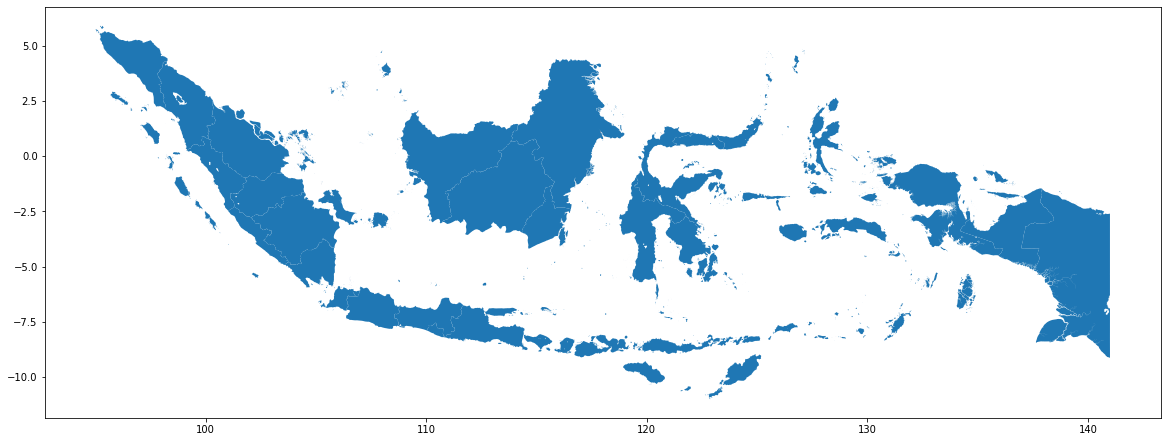

In [6]:
ina.plot(figsize=(20,20))

In [12]:
provinsi = ina.merge(df_kasus, left_on = 'Propinsi', right_on = 'Provinsi')
provinsi = provinsi.drop(columns=['Provinsi','SUMBER','updateTime','kode','ID','latitude','longitude','updateDate'],axis=1)
provinsi.set_index("Propinsi", inplace=True)
provinsi

,geometry,Active cases
Propinsi,,
NUSATENGGARA BARAT,"MULTIPOLYGON Z (((117.62720 -8.50640 0.00000, ...",2278
GORONTALO,"MULTIPOLYGON Z (((122.18814 1.04530 0.00000, 1...",141
SULAWESI TENGGARA,"MULTIPOLYGON Z (((120.98423 -2.83534 0.00000, ...",300
DAERAH ISTIMEWA YOGYAKARTA,"POLYGON Z ((110.01183 -7.88690 0.00000, 110.01...",3494
JAWA TENGAH,"MULTIPOLYGON Z (((108.82934 -6.74608 0.00000, ...",9726
PROBANTEN,"MULTIPOLYGON Z (((106.72134 -6.09000 0.00000, ...",1875
JAWA TIMUR,"MULTIPOLYGON Z (((110.89835 -8.17206 0.00000, ...",1741
MALUKU UTARA,"MULTIPOLYGON Z (((127.74207 0.81629 0.00000, 1...",101
MALUKU,"MULTIPOLYGON Z (((130.83130 -3.47141 0.00000, ...",306


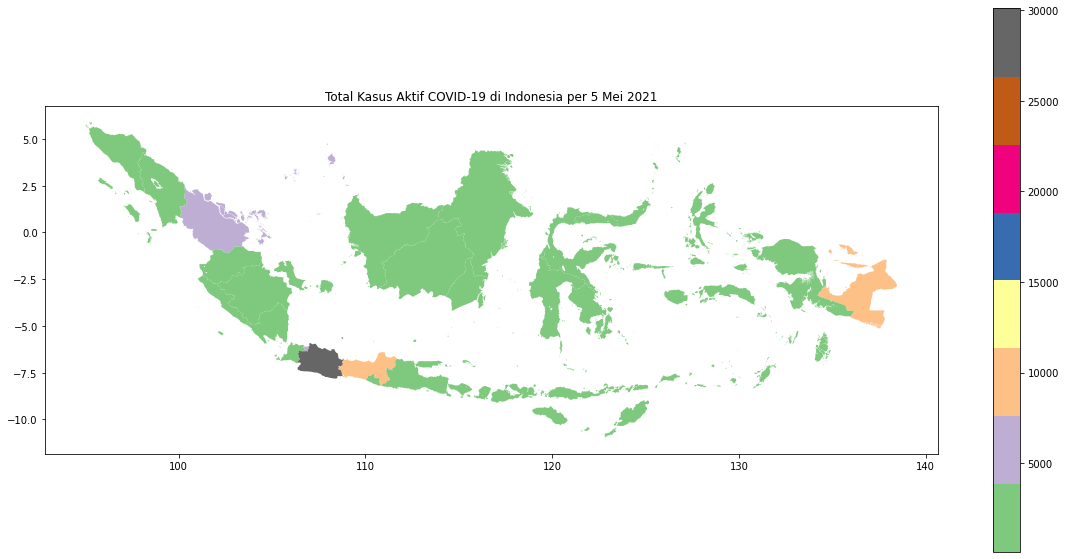

In [11]:
# import matplotlib.pyplot as plt
fig, ax = plt.subplots(1, 1, figsize=(20, 10))
ax.set_title('Total Kasus Aktif COVID-19 di Indonesia per 5 Mei 2021')
provinsi.plot(column='Active cases', ax=ax, legend=True, cmap='Accent')

In [9]:
import folium as fo
from folium.plugins import FloatImage

map = fo.Map(
    location = [-0.5273,118.6963],
    tiles = 'OpenStreetMap',
    zoom_start = 5
)

for i in range(34):
    fo.Marker(
        [df_kasus.iloc[i]['latitude'],
        df_kasus.iloc[i]['longitude']],
        popup = '<b>Kasus Aktif:' + str(df_kasus.iloc[i]['Active cases'])+'<b>',
        tooltip = df_kasus.iloc[i]['Provinsi'],
        icon = fo.Icon(color='red', prefix='fa',icon='plus-circle')
    ).add_to(map)
map